In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

# load the CIFAR data
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
NUM_CLASSES = 10

Using TensorFlow backend.


In [2]:
# convert 0-255 ints to normalized float32s
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

# converts numbers to a binary matrix representation
ytrain = to_categorical( ytrain, NUM_CLASSES )
ytest = to_categorical( ytest, NUM_CLASSES )

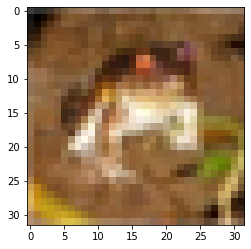

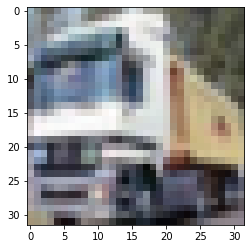

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
plt.imshow(xtrain[0,:,:,:])
plt.show()
plt.imshow(xtrain[1,:,:,:])
plt.show()

In [12]:
## Build a convnet using the keras functional api
from keras.layers import Flatten, Dense, Input, Conv2D
from keras.layers import  BatchNormalization, LeakyReLU, Dropout
from keras.models import Model

input_layer = Input(shape=(32,32,3))

# first conv layer
x = Conv2D(
    filters = 32
    , kernel_size=3
    , strides=1
    , padding = 'same'
) (input_layer)
#batchnorm + leakyrelu
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# second conv layer
x = Conv2D(
    filters = 32
    , kernel_size=3
    , strides=2
    , padding = 'same'
) (x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# third conv layer
x = Conv2D(
    filters = 64
    , kernel_size=3
    , strides=1
    , padding = 'same'
) (x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# fourth conv layer
x = Conv2D(
    filters = 64
    , kernel_size=3
    , strides=2
    , padding = 'same'
) (x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


#now flatten
x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

#dense+softmax to output
output_layer = Dense( units=NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0   

In [14]:
# compile the model
from keras.optimizers import Adam
opt = Adam( lr=0.0005 )
model.compile( loss = 'categorical_crossentropy', optimizer=opt,
              metrics = ['accuracy'])

In [15]:
# train the model
model.fit( xtrain, 
         ytrain,
         batch_size=32,
         epochs=10,
         shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 193s 4ms/step - loss: 1.5663 - accuracy: 0.4506
Epoch 2/10
50000/50000 [==============================] - 188s 4ms/step - loss: 1.1585 - accuracy: 0.5910
Epoch 3/10
50000/50000 [==============================] - 156s 3ms/step - loss: 1.0109 - accuracy: 0.6438
Epoch 4/10
50000/50000 [==============================] - 178s 4ms/step - loss: 0.9294 - accuracy: 0.6748
Epoch 5/10
50000/50000 [==============================] - 149s 3ms/step - loss: 0.8654 - accuracy: 0.6986
Epoch 6/10
50000/50000 [==============================] - 193s 4ms/step - loss: 0.8111 - accuracy: 0.7149
Epoch 7/10
50000/50000 [==============================] - 233s 5ms/step - loss: 0.7710 - accuracy: 0.7332
Epoch 8/10
50000/50000 [==============================] - 184s 4ms/step - loss: 0.7262 - accuracy: 0.7471
Epoch 9/10
50000/50000 [==============================] - 150s 3ms/step - loss: 0.6913 - accuracy: 0.7585
Epoch 10/10
50000/50000 [=====================

In [16]:
model.evaluate(xtest, ytest, batch_size=1000)

10000/10000 [==============================] - 8s 808us/step


[0.8865462064743042, 0.7003999948501587]

In [17]:
## let's try that again with pytorch
# imports
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.core.lightning import LightningModule
print('Done')

Done


In [60]:
# build the model
class CIFARModel( LightningModule):
    def __init__( self ):
        super().__init__()
        self.layer0 = nn.Conv2d( in_channels=3
                                , out_channels=32
                                , kernel_size=3
                                , stride=1
                                , padding=2 )
        self.layer1 = nn.BatchNorm2d( 32 )
        self.layer2 = nn.LeakyReLU()

        self.layer3 = nn.Conv2d( in_channels=32
                                , out_channels=32
                                , kernel_size=3
                                , stride=2
                                , padding=1 )
        self.layer4 = nn.BatchNorm2d( 32 )
        self.layer5 = nn.LeakyReLU()

        self.layer6 = nn.Conv2d( in_channels=32
                                , out_channels=64
                                , kernel_size=3
                                , stride=1
                                , padding=2 )
        self.layer7 = nn.BatchNorm2d( 64 )
        self.layer8 = nn.LeakyReLU()

        self.layer9 = nn.Conv2d( in_channels=64
                                , out_channels=64
                                , kernel_size=3
                                , stride=2
                                , padding=1 )
        self.layer10 = nn.BatchNorm2d( 64 )
        self.layer11 = nn.LeakyReLU()
        
        self.layer12 = nn.Flatten()
        self.layer13 = nn.Linear( 6400, 128)
        self.layer14 = nn.LeakyReLU()
        self.layer15 = nn.Dropout(0.5)
        self.layer16 = torch.nn.Linear( 128, NUM_CLASSES)
        
        self.loss = torch.nn.CrossEntropyLoss()
    def forward( self, x ):
#        batch_size, channels, width, height = x.size()
        x = self.layer0( x )
        x = self.layer1( x )
        x = self.layer2( x )
        x = self.layer3( x )
        x = self.layer4( x )
        x = self.layer5( x )
        x = self.layer6( x )
        x = self.layer7( x )
        x = self.layer8( x )
        x = self.layer9( x )
        x = self.layer10( x )
        x = self.layer11( x )
        x = self.layer12( x )
        x = self.layer13( x )
        x = self.layer14( x )
        x = self.layer15( x )
        x = self.layer16( x )
        return x
    def training_step( self, batch, batch_idx):
        data, target = batch
        logits = self.forward( data )
        loss = self.loss(logits, torch.max(target,1)[1])
        return {'loss': loss}
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=5e-4)
print('Done')

Done


50000
(3, 32, 32)


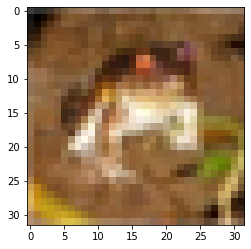

(32, 32, 3)
Done


In [58]:
# write a custom dataset for the cifar data
# (or you could just use the torchvision CIFAR dataset/dataloader)
from torch.utils.data import Dataset
class CIFARDataset( Dataset ):
    def __init__( self, xtrain, ytrain):
        # need to reorder the data since pytorch expects channels as dim 2
        xtrain = np.swapaxes( xtrain, 1, 3)
        xtrain = np.swapaxes( xtrain, 2, 3)
        self.data = np.asarray(xtrain)
        self.labels = np.asarray(ytrain)
    def __getitem__( self, index):
        pixels = self.data[index,:,:,:]
        label = self.labels[index,:]
        return pixels, label
    def __len__(self):
        return self.data.shape[0]

dataset = CIFARDataset( xtrain, ytrain )
print(len(dataset))
(a,b) = dataset[0]
print(a.shape)
a = np.swapaxes( a, 0, 2)
a = np.swapaxes( a, 0, 1)
plt.imshow( a )
plt.show()
print(a.shape)
print('Done')

from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=3)

In [63]:
(a,b) = dataset[0:31]
model = CIFARModel()
logits = model.forward( torch.tensor(a) )

In [64]:
# train the model
trainer = Trainer(max_epochs=10, gpus=0)
trainer.fit(model, dataloader)
print('Done')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

   | Name    | Type             | Params
----------------------------------------------
0  | layer0  | Conv2d           | 896   
1  | layer1  | BatchNorm2d      | 64    
2  | layer2  | LeakyReLU        | 0     
3  | layer3  | Conv2d           | 9.2 K 
4  | layer4  | BatchNorm2d      | 64    
5  | layer5  | LeakyReLU        | 0     
6  | layer6  | Conv2d           | 18.5 K
7  | layer7  | BatchNorm2d      | 128   
8  | layer8  | LeakyReLU        | 0     
9  | layer9  | Conv2d           | 36.9 K
10 | layer10 | BatchNorm2d      | 128   
11 | layer11 | LeakyReLU        | 0     
12 | layer12 | Flatten          | 0     
13 | layer13 | Linear           | 819 K 
14 | layer14 | LeakyReLU        | 0     
15 | layer15 | Dropout          | 0     
16 | layer16 | Linear           | 1.3 K 
17 | loss    | CrossEntropyLoss | 0     
----------------------------------------------
886 K     Trainable params
0         Non-trainable 

Training: 0it [00:00, ?it/s]

Done


In [65]:
model.eval()
dataset2 = CIFARDataset( xtest, ytest )
dataloader2 = DataLoader(dataset2, batch_size=32, shuffle=False, num_workers=3)
correct,total = 0,0
for i, data in enumerate( dataloader2, 0):
    x,targets = data
    output = model(x)
    _,predicted = torch.max(output,1)
    _,targinds = torch.max(targets,1)
    correct += (predicted == targinds).sum().item()
    total += x.size()[0]

print( correct / total)

0.7621
